In [34]:
import pandas as pd  # data manipulation
import numpy as np   # numerical operations
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [35]:
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df.head()



,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [36]:
print("\nDataset Info:")
df.info()

print("\nShape of the DataFrame:", df.shape)

print("\nStatistical Summary:")
df.describe().T



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB

Shape of the DataFrame: (2861, 11)

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


### Understanding the Data
- Potability = 0 → Unsafe Drinking Water  
- Potability = 1 → Safe Drinking Water


In [37]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64


In [38]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')


In [39]:
df = df.sort_values(by=['id', 'date'])

In [40]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [41]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
df = df.dropna(subset=pollutants)

print("\nMissing Values After Drop:")
print(df.isnull().sum())


Missing Values After Drop:
id           0
date         0
NH4          2
BSK5         0
Suspended    2
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
year         0
month        0
dtype: int64


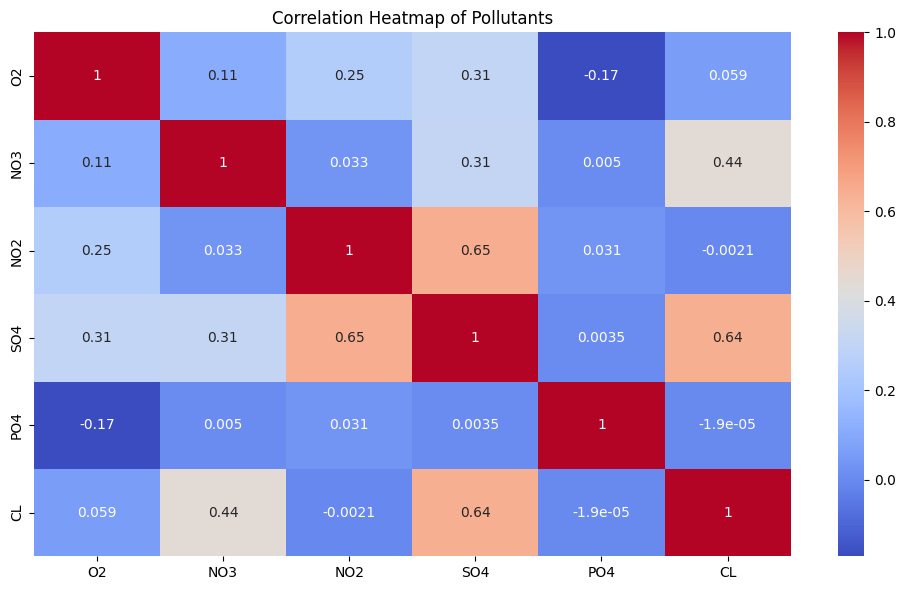

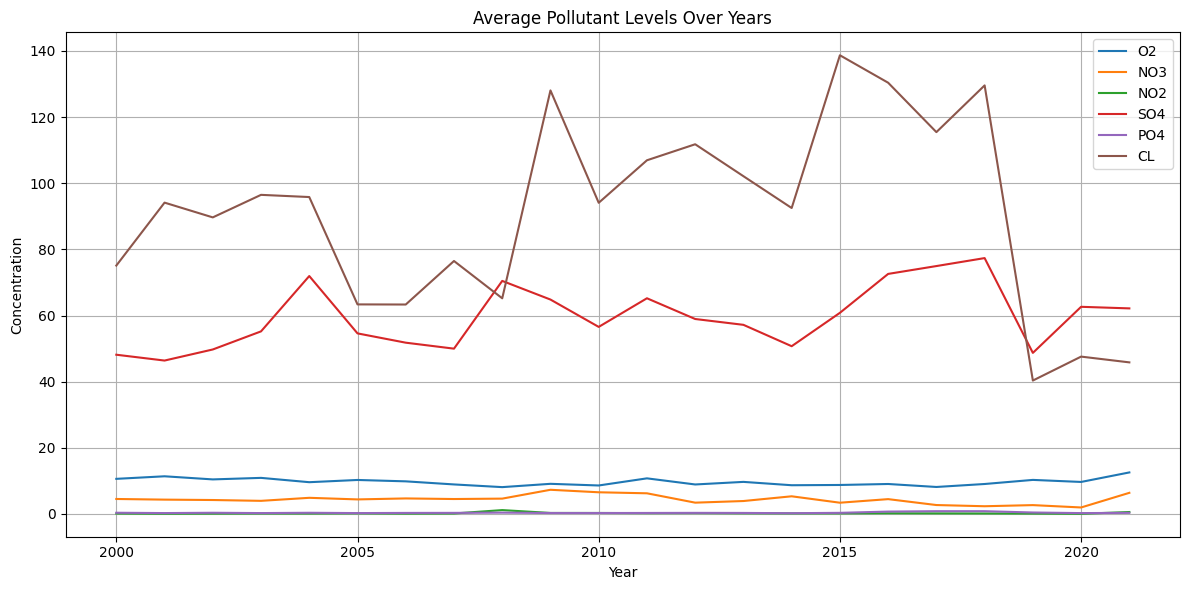

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Pollutants")
plt.tight_layout()
plt.show()

# Trend of Average Pollutants Over Years
avg_by_year = df.groupby('year')[pollutants].mean()

plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    plt.plot(avg_by_year.index, avg_by_year[pollutant], label=pollutant)

plt.title("Average Pollutant Levels Over Years")
plt.xlabel("Year")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
X = df[['id', 'year']]
y = df[pollutants]

In [44]:
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42)

In [46]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,n_jobs,None
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [47]:
y_pred = model.predict(X_test)

print("\nModel Performance on Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2 :', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()



Model Performance on Test Data:
O2:
   MSE: 22.21825046040189
   R2 : -0.01674257045728833

NO3:
   MSE: 18.153106746365886
   R2 : 0.5162032171220556

NO2:
   MSE: 10.607352172601502
   R2 : -78.42066512350873

SO4:
   MSE: 2412.139350033052
   R2 : 0.4118345603876148

PO4:
   MSE: 0.38496938017964155
   R2 : 0.3221189891402043

CL:
   MSE: 34882.81433245622
   R2 : 0.7357918194149974



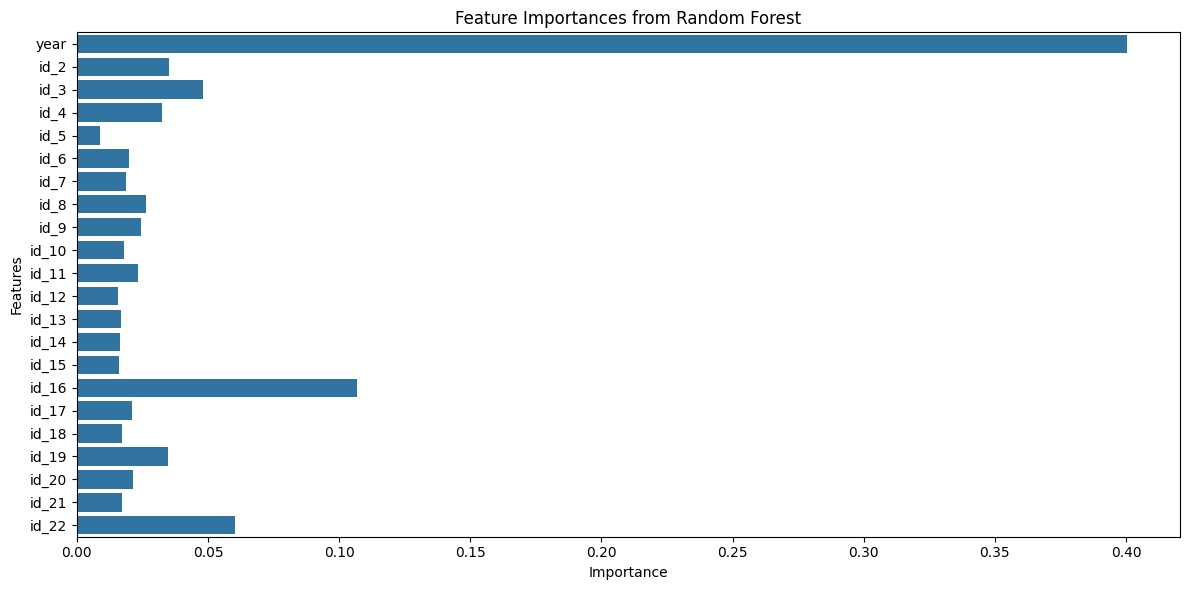

In [48]:
# Feature Importance Plot (after evaluating the model)
importances = model.estimators_[0].feature_importances_
features = X_encoded.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [50]:
station_id = '22'
year_input = 2024
input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align columns with training data
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]

predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")
predicted_pollutants = model.predict(input_encoded)[0]




Predicted pollutant levels for station '22' in 2024:
  O2: 12.60
  NO3: 6.90
  NO2: 0.13
  SO4: 143.08
  PO4: 0.50
  CL: 67.33


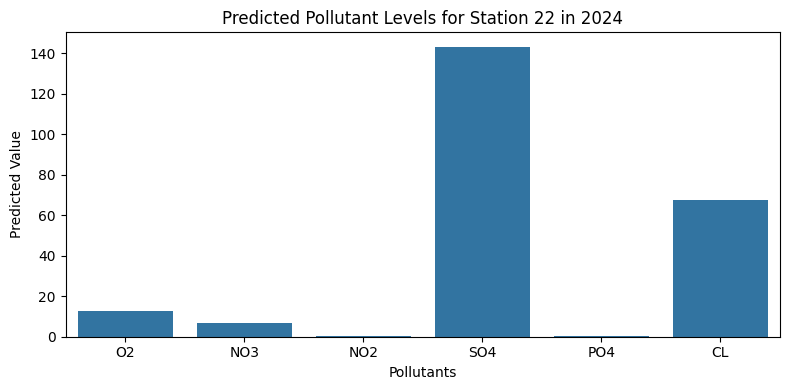

In [51]:
# Bar Chart for Predicted Pollutants
pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
plt.figure(figsize=(8, 4))
sns.barplot(x=pollutants, y=predicted_pollutants)
plt.title("Predicted Pollutant Levels for Station 22 in 2024")
plt.xlabel("Pollutants")
plt.ylabel("Predicted Value")
plt.tight_layout()
plt.show()


In [33]:
joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), 'model_columns.pkl')
print("\nModel and column structure saved successfully!")




Model and column structure saved successfully!
